讀取 train/test 資料

In [ ]:
import pandas as pd

train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')


查看資料維度、前幾筆

In [ ]:
print(train.shape, test.shape)
display(train.head())
display(test.head())
display(sample_submission.head())


(51635, 4) (7695, 4)


,id,plate,date,price
0,1,X059CP797,2024-12-26 00:00:00,65000
1,2,Y800MH790,2024-07-12 21:31:37,100000
2,3,A212TX77,2024-04-18 00:00:00,290000
3,4,P001AY199,2025-01-03 00:27:15,680000
4,5,P001AY199,2025-01-10 09:32:41,750000


,id,plate,date,price
0,51636,P700TT790,2025-01-27 00:00:00,NaN
1,51637,M081TX797,2025-02-10 00:00:00,NaN
2,51638,T333HX777,2025-02-11 00:00:00,NaN
3,51639,H744BH977,2025-02-03 00:00:00,NaN
4,51640,X066EM777,2025-02-12 00:00:00,NaN


,id,price
0,51636,100000
1,51637,100000
2,51638,100000
3,51639,100000
4,51640,100000


檢查缺失值與資料型態

In [ ]:
print(train.info())
print(train.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51635 entries, 0 to 51634
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      51635 non-null  int64 
 1   plate   51635 non-null  object
 2   date    51635 non-null  object
 3   price   51635 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.6+ MB
None
id       0
plate    0
date     0
price    0
dtype: int64


資料探索 (EDA)

1.統計目標值分佈

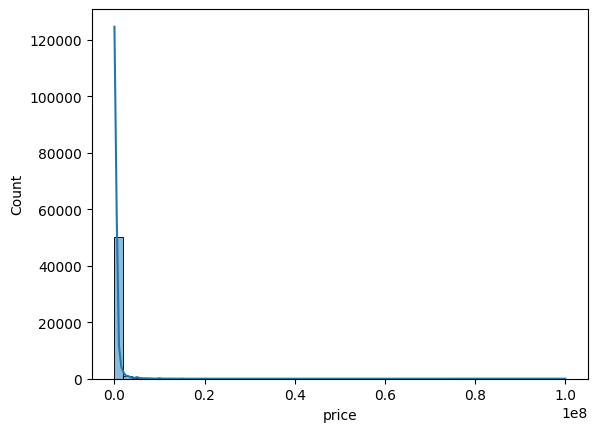

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train['price'], bins=50, kde=True)
plt.show()


2.類別特徵觀察

In [ ]:
# 顯示所有欄位名稱
print(train.columns.tolist())


['id', 'plate', 'date', 'price']


In [ ]:
cat_cols = ['id', 'plate', 'date', 'price']
for col in cat_cols:
    print(f"── {col} 共 {train[col].nunique()} 種")
    display(train[col].value_counts().head(10))

── id 共 51635 種


,count
id,
51635,1
1,1
2,1
51619,1
51618,1
51617,1
51616,1
51615,1
51614,1


── plate 共 43605 種


,count
plate,
A949MP190,119
X582XX190,82
B777OC90,72
P606PP190,55
E750OX750,51
O595OO150,45
E555EE90,43
B333XP750,40
H001BB150,36


── date 共 9092 種


,count
date,
2025-02-11 00:00:00,1325
2025-02-12 00:00:00,684
2025-02-08 00:00:00,674
2025-01-31 00:00:00,535
2025-02-10 00:00:00,433
2025-02-04 00:00:00,417
2025-02-07 00:00:00,385
2025-02-09 00:00:00,377
2025-01-16 00:00:00,371


── price 共 798 種


,count
price,
100000,3127
50000,2791
150000,2391
200000,2227
60000,2176
70000,1997
30000,1823
250000,1794
300000,1674


In [ ]:
import pandas as pd

# 1. 讀回 train/test/sample_submission（如果還沒讀 sample_submission）
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
sub   = pd.read_csv('sample_submission.csv')

# 2. 解析 date 欄位，拆出年/月/日
train['date'] = pd.to_datetime(train['date'])
test['date']  = pd.to_datetime(test['date'])

for df in [train, test]:
    df['year']  = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day']   = df['date'].dt.day

# 3. 解析 plate 欄位
#    - 抽出其中所有數字，做成一個整數 numeric_part
#    - 計算數字總和 digit_sum
#    - 計算字母數量 letter_count
import re

def parse_plate(s):
    digits = re.findall(r'\d', s)
    letters = re.findall(r'[A-Za-z]', s)
    numeric_part = int(''.join(digits)) if digits else 0
    return pd.Series({
        'numeric_part': numeric_part,
        'digit_sum': sum(map(int, digits)) if digits else 0,
        'letter_count': len(letters)
    })

plate_feats_train = train['plate'].apply(parse_plate)
plate_feats_test  = test['plate'].apply(parse_plate)

train = pd.concat([train, plate_feats_train], axis=1)
test  = pd.concat([test,  plate_feats_test],  axis=1)

# 4. 看看結果
print("── train 前五筆 ──")
display(train[['id','plate','numeric_part','digit_sum','letter_count','year','month','day','price']].head())

print("── test 前五筆 ──")
display(test[['id','plate','numeric_part','digit_sum','letter_count','year','month','day']].head())

# 5. 確認 sample_submission 格式
print("── sample_submission ──")
display(sub.head())


── train 前五筆 ──


,id,plate,numeric_part,digit_sum,letter_count,year,month,day,price
0,1,X059CP797,59797,37,3,2024,12,26,65000
1,2,Y800MH790,800790,24,3,2024,7,12,100000
2,3,A212TX77,21277,19,3,2024,4,18,290000
3,4,P001AY199,1199,20,3,2025,1,3,680000
4,5,P001AY199,1199,20,3,2025,1,10,750000


── test 前五筆 ──


,id,plate,numeric_part,digit_sum,letter_count,year,month,day
0,51636,P700TT790,700790,23,3,2025,1,27
1,51637,M081TX797,81797,32,3,2025,2,10
2,51638,T333HX777,333777,30,3,2025,2,11
3,51639,H744BH977,744977,38,3,2025,2,3
4,51640,X066EM777,66777,33,3,2025,2,12


── sample_submission ──


,id,price
0,51636,100000
1,51637,100000
2,51638,100000
3,51639,100000
4,51640,100000


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# 特徵欄位
feat_cols = ['numeric_part', 'digit_sum', 'letter_count', 'year', 'month', 'day']

# X, y
X = train[feat_cols].values
y = train['price'].values

# 測試集特徵
X_test = test[feat_cols].values

# 分割驗證集
X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 假設 X_tr, X_val, y_tr, y_val 已經準備好了
# （如果沒，請先執行那段 train_test_split 的程式）

# 1. 定義模型
model = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. 在訓練集上訓練
model.fit(X_tr, y_tr)

# 3. 在驗證集上預測
val_pred = model.predict(X_val)

# 4. 計算 RMSE
mse = mean_squared_error(y_val, val_pred)
rmse = np.sqrt(mse)
print(f"Validation RMSE: {rmse:.2f}")


Validation RMSE: 1766726.59


In [ ]:
import pandas as pd
import re

# 1. 讀檔
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
sub   = pd.read_csv('sample_submission.csv')

# 2. 解析 date
for df in [train, test]:
    df['date'] = pd.to_datetime(df['date'])
    df['year']  = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day']   = df['date'].dt.day

# 3. 解析 plate
def parse_plate(s):
    digits  = re.findall(r'\d', s)
    letters = re.findall(r'[A-Za-z]', s)
    numeric_part = int(''.join(digits)) if digits else 0
    return pd.Series({
        'numeric_part': numeric_part,
        'digit_sum': sum(map(int, digits)) if digits else 0,
        'letter_count': len(letters)
    })

train = pd.concat([train, train['plate'].apply(parse_plate)], axis=1)
test  = pd.concat([test,  test['plate'].apply(parse_plate)],  axis=1)


In [ ]:
print(train.columns.tolist())
# 應該看到 ['id','plate','date','price','year','month','day',
#             'numeric_part','digit_sum','letter_count', …]


['id', 'plate', 'date', 'price', 'year', 'month', 'day', 'numeric_part', 'digit_sum', 'letter_count']


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

feat_cols = ['numeric_part','digit_sum','letter_count','year','month','day']
X = train[feat_cols].values
y = train['price'].values
X_test = test[feat_cols].values

# 重新訓練
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# 預測並輸出
sub['price'] = model.predict(X_test)
sub.to_csv('submission.csv', index=False)
